<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install keras

In [ ]:
!pip install matplotlib

In [ ]:
!pip install sklearn

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')
#data= data[::-1] 
data.index.freg='Date'
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
1,2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
3,2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
4,2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...,...
2013,2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2014,2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2015,2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813
2016,2020-01-08,297.160004,304.439911,297.156006,303.190002,299.284088,33090946


In [48]:
data.head(), data.tail()

(         Date       Open       High        Low      Close  Adj Close    Volume
 0  2012-01-03  58.500000  58.928570  58.428570  58.747143  56.011238  75564699
 1  2012-01-04  58.599998  59.240002  58.468571  59.062859  56.312252  65061108
 2  2012-01-05  59.278572  59.792858  58.952858  59.718571  56.937424  67816805
 3  2012-01-06  59.967140  60.392857  59.888573  60.342857  57.532646  79596412
 4  2012-01-09  60.788570  61.107143  60.192856  60.247143  57.441391  98505792,
             Date        Open        High  ...       Close   Adj Close    Volume
 2013  2020-01-03  297.149994  300.579987  ...  297.429993  293.598297  36633878
 2014  2020-01-06  293.790009  299.959991  ...  299.799988  295.937744  29644644
 2015  2020-01-07  299.839996  300.899994  ...  298.390015  294.545959  26207813
 2016  2020-01-08  297.160004  304.439911  ...  303.190002  299.284088  33090946
 2017  2020-01-09  307.234985  310.429993  ...  309.630005  305.641113  42621542
 
 [5 rows x 7 columns])

In [49]:
open_price = data.iloc[:,1:2]
train_set = open_price[:1816].values
test_set = open_price[1816:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (1816, 1)
Test size: (202, 1)


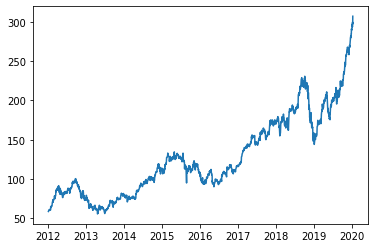

In [61]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price,fmt='-')
plt.savefig("Bitcoin.jpg")

In [51]:
len(data)

2018

In [62]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [63]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [64]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,30,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)
y_train = x_train.reshape(-1,1)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

# dua ve 0->1 cho tap test
#x_test = x_test.reshape(-1,30)
x_test = x_test.reshape(-1)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)

date_test = date_test.reshape(-1,1)

In [85]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 202 doan 1
n_input = 202
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0))

model.add(LSTM(units=50))
model.add(Dropout(0))
model.add(Dense(1))


In [86]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/LSTM_Model/lstm_test')

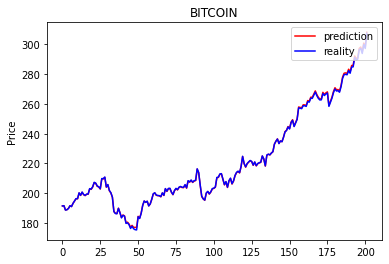

In [89]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/LSTM_Model/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:202], color='r')
plt.plot(test_2[:202] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [ ]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)